# Momento de Retroalimentación: 
## Módulo 2 Implementación de una técnica de aprendizaje máquina sin el uso de un framework.
## (Portafolio Implementación)
### Alan Contreras Prieto - A01749667

In [9]:
# Librerias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Dataset

In [10]:
data = sklearn.datasets.make_classification(
    n_samples=10000, 
    n_features=5,  
    n_classes=2
)

X = data[0]
y = data[1]
df = pd.DataFrame(X, columns=['x1', 'x2', 'x3', 'x4', 'x5'])
df['y'] = y
df["y"].value_counts()

y
1    5004
0    4996
Name: count, dtype: int64

In [11]:
df.describe()

,x1,x2,x3,x4,x5,y
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.000811,-0.000630,-0.009114,-0.001393,-0.000254,0.500400
std,1.332696,0.828730,0.998444,1.280949,1.080928,0.500025
min,-3.641258,-1.433409,-4.035031,-5.111703,-2.223805,0.000000
25%,-1.086004,-0.857876,-0.683379,-1.005366,-1.002533,0.000000
50%,-0.062672,0.051680,-0.003424,0.513974,-0.221591,1.000000
75%,0.773864,0.781952,0.647923,1.026869,0.998858,1.000000
max,6.314862,1.508511,3.555843,2.797277,3.602863,1.000000


In [12]:
# Dividir datos en entrenamiento y  prueba
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Clase Red Neuronal

In [13]:
# Red
class RedNeuronal:
    # Inicialización 
    def __init__(self, layers):
        self.layers = layers
        self.weights = []
        self.biases = []
        self.weightsΔ = []
        self.biasesΔ = []

        # Inicialización de pesos y biases aleatorios
        for i in range(len(layers) - 1):
            # Pesos: matriz de (neuronas capa actual, neuronas capa siguiente)
            w = np.random.randn(layers[i], layers[i+1])
            b = np.zeros((1, layers[i+1]))
            self.weights.append(w)
            self.biases.append(b)

        # Initialize each Δw and Δb to zero.
        for i in range(len(self.layers) - 1):
            wΔ = np.zeros((self.layers[i], self.layers[i+1]))
            bΔ = np.zeros((1, self.layers[i+1]))
            self.weightsΔ.append(wΔ)
            self.biasesΔ.append(bΔ)

    # Mostrar pesos
    def show_weights(self):
        for i in range(len(self.layers)-1):
            print(f"Capa {i+1}-{i+2}")
            print("Weights: ", self.weights[i],"Bias: ",self.biases[i])

    #Función de activación sigmoide
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    # Feedforward
    def predict(self, X):
        a = X
        for w, b in zip(self.weights, self.biases):
            z = np.dot(a, w) + b
            a = self.sigmoid(z)
        return a

    def fit(self, X, y, epochs=1000, learning_rate=0.01):
        for epoch in range(epochs):
            # Feedforward
            a = self.predict(X)

            # loss (MSE)
            loss = np.mean((a - y) ** 2)

            # Backward pass (gradient descent)
            self.backward(X, y, a, learning_rate)

            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss}")

    def backward(self, X, y, a, learning_rate):
        # Paso 1: forward con almacenamiento de activaciones y z
        activations = [X]
        zs = []  # valores antes de activación

        a_tmp = X
        for w, b in zip(self.weights, self.biases):
            z = np.dot(a_tmp, w) + b
            zs.append(z)
            a_tmp = self.sigmoid(z)
            activations.append(a_tmp)

        # Paso 2: error de salida
        delta = (activations[-1] - y) * (activations[-1] * (1 - activations[-1]))

        # Gradientes de última capa
        nabla_w = [np.dot(activations[-2].T, delta)]
        nabla_b = [np.sum(delta, axis=0, keepdims=True)]

        # Paso 3: backpropagation en capas ocultas
        for l in range(2, len(self.layers)):
            z = zs[-l]
            sp = activations[-l] * (1 - activations[-l])  # derivada de sigmoide
            delta = np.dot(delta, self.weights[-l+1].T) * sp
            nabla_w.insert(0, np.dot(activations[-l-1].T, delta))
            nabla_b.insert(0, np.sum(delta, axis=0, keepdims=True))

        # Paso 4: actualizar pesos y biases
        for i in range(len(self.weights)):
            self.weights[i] -= learning_rate * nabla_w[i]
            self.biases[i] -= learning_rate * nabla_b[i]


# Definición Red

In [14]:
capas = [5,       # Capa de entrada
       3,5,3,   # Capas ocultas
       1]       # Capa de salida
red = RedNeuronal(capas)
print("Pesos iniciales (antes de entrenamiento):")
red.show_weights()

Pesos iniciales (antes de entrenamiento):
Capa 1-2
Weights:  [[-1.29245161  0.88801209  0.81974007]
 [ 1.68031122  1.36160637 -0.09604365]
 [ 1.45705911  1.27931716 -0.22851315]
 [ 0.24107995  0.13429088 -0.75683223]
 [ 0.2531582  -1.29569584  0.63129507]] Bias:  [[0. 0. 0.]]
Capa 2-3
Weights:  [[-0.5629945  -1.44545218  0.95619503 -1.02087557  0.89678102]
 [ 0.63928644  0.05200098  1.51987727  0.83075517 -1.50307306]
 [ 0.3573575  -0.6069248   0.36689573  1.79559683 -0.88696686]] Bias:  [[0. 0. 0. 0. 0.]]
Capa 3-4
Weights:  [[ 1.52477764 -1.1761076  -0.03737073]
 [ 0.29326711  1.01258025  0.01539325]
 [-1.27005019  0.22736351 -0.38232445]
 [-0.27877097 -0.19570778  1.43453104]
 [ 0.3384298   1.019672   -1.84333349]] Bias:  [[0. 0. 0.]]
Capa 4-5
Weights:  [[-1.11985748]
 [-0.82252554]
 [-1.71342147]] Bias:  [[0.]]


### Predicción inicial


Reporte de Clasificación:

              precision    recall  f1-score   support

     Clase 0       0.50      1.00      0.67      3998
     Clase 1       0.00      0.00      0.00      4002

    accuracy                           0.50      8000
   macro avg       0.25      0.50      0.33      8000
weighted avg       0.25      0.50      0.33      8000



c:\Users\Alan Contreras P\miniconda3\envs\retoHousing\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Alan Contreras P\miniconda3\envs\retoHousing\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Alan Contreras P\miniconda3\envs\retoHousing\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

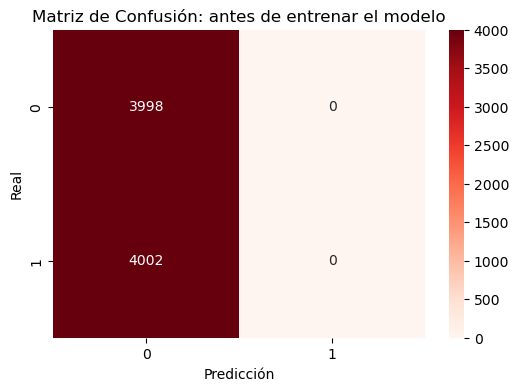

In [15]:
y_pred = (red.predict(x_train) >= 0.5).astype(int)  # predicciones binarizadas

# Reporte de métricas
print("\nReporte de Clasificación:\n")
print(classification_report(y_train, y_pred, target_names=["Clase 0", "Clase 1"]))

# Crear matriz de confusión
cm = confusion_matrix(y_train, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión: antes de entrenar el modelo")
plt.show()

# Entrenamiento

In [16]:
red.fit(x_train, y_train.reshape(-1, 1), epochs=1001, learning_rate=0.01)

Epoch 0, Loss: 0.37952167670468473
Epoch 100, Loss: 0.007096094076156059
Epoch 200, Loss: 0.007060526348395969
Epoch 300, Loss: 0.0071295316030255745
Epoch 400, Loss: 0.007191741541359766
Epoch 500, Loss: 0.007010775293991706
Epoch 600, Loss: 0.006900076843850322
Epoch 700, Loss: 0.006817513173182534
Epoch 800, Loss: 0.006751416241607217
Epoch 900, Loss: 0.006695177738729033
Epoch 1000, Loss: 0.006646271709476767


In [17]:
print("Pesos finales (despues de entrenamiento):")
red.show_weights()

Pesos finales (despues de entrenamiento):
Capa 1-2
Weights:  [[ 0.29775336  0.66133926 -0.14167642]
 [ 4.32718829 -2.12146951 -2.4352159 ]
 [ 0.23521727  0.41381429 -0.26033323]
 [ 1.2197401  -2.97290336 -2.0545699 ]
 [ 3.36769253 -4.63056435 -1.93949639]] Bias:  [[-1.27075852  0.50155533 -0.07913242]]
Capa 2-3
Weights:  [[-2.85134018 -1.43199629  0.70916515 -2.67526026  2.84585127]
 [ 2.57851401 -0.48994707  1.04744748  2.02507354 -3.37048468]
 [ 0.95679314 -0.95119668 -0.02926934  2.16108994 -1.67168715]] Bias:  [[-0.58152274 -0.58559573 -0.79822706 -0.766112    0.31461844]]
Capa 3-4
Weights:  [[ 0.93148682 -3.54980032  0.79795304]
 [ 0.08370056  0.30982111  0.01412564]
 [-2.38842205  0.01615825 -0.47354567]
 [-1.02997074 -3.00942536  2.13024115]
 [-0.31468891  4.54192383 -2.72134756]] Bias:  [[-1.33690083  0.45367738 -0.056495  ]]
Capa 4-5
Weights:  [[-0.16712009]
 [ 7.672656  ]
 [-3.09524299]] Bias:  [[-2.53012342]]


# Analisis de resultados

## Modelo 1


Reporte de Clasificación:

              precision    recall  f1-score   support

     Clase 0       1.00      0.99      0.99      3998
     Clase 1       0.99      1.00      0.99      4002

    accuracy                           0.99      8000
   macro avg       0.99      0.99      0.99      8000
weighted avg       0.99      0.99      0.99      8000



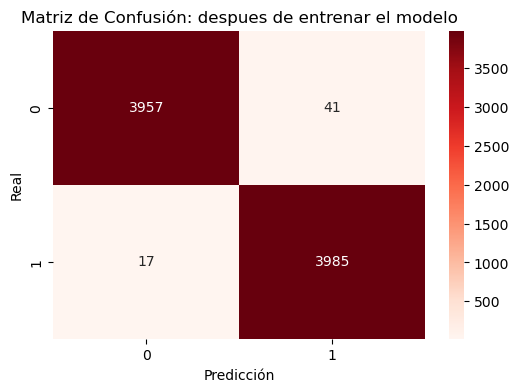

In [18]:
y_pred = (red.predict(x_train) >= 0.5).astype(int)  # predicciones binarizadas

# Reporte de métricas
print("\nReporte de Clasificación:\n")
print(classification_report(y_train, y_pred, target_names=["Clase 0", "Clase 1"]))

# Crear matriz de confusión
cm = confusion_matrix(y_train, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión: despues de entrenar el modelo")
plt.show()


Reporte de Clasificación:

              precision    recall  f1-score   support

     Clase 0       0.99      0.98      0.99       998
     Clase 1       0.99      0.99      0.99      1002

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



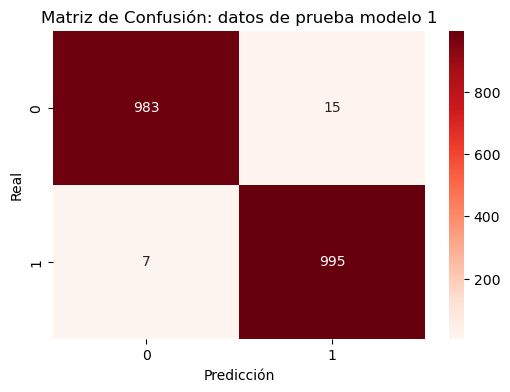

In [19]:
y_pred = (red.predict(x_test) >= 0.5).astype(int)  # predicciones binarizadas

# Reporte de métricas
print("\nReporte de Clasificación:\n")
print(classification_report(y_test, y_pred, target_names=["Clase 0", "Clase 1"]))

# Crear matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión: datos de prueba modelo 1")
plt.show()

## Modelo 2

Epoch 0, Loss: 0.27796862094866653
Epoch 100, Loss: 0.009719540540550778
Epoch 200, Loss: 0.007215678838149354
Epoch 300, Loss: 0.007005936382756364
Epoch 400, Loss: 0.00679209244888088
Epoch 500, Loss: 0.006741828879190376
Epoch 600, Loss: 0.006661387856923141
Epoch 700, Loss: 0.006572031569802028
Epoch 800, Loss: 0.00651759300103512
Epoch 900, Loss: 0.0064760992304880765
Epoch 1000, Loss: 0.006442672929742198

Reporte de Clasificación:

              precision    recall  f1-score   support

     Clase 0       0.99      0.99      0.99       998
     Clase 1       0.99      0.99      0.99      1002

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



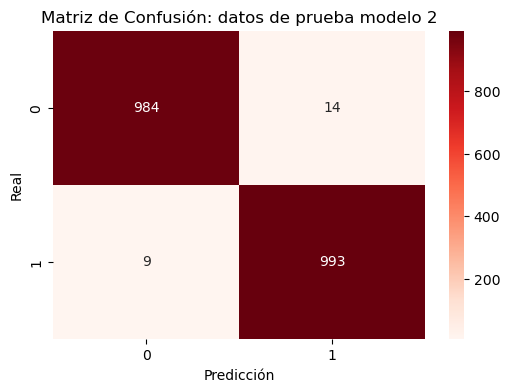

In [20]:
capas = [5,       # Capa de entrada
       8,10,5,3,   # Capas ocultas
       1]       # Capa de salida
red = RedNeuronal(capas)
red.fit(x_train, y_train.reshape(-1, 1), epochs=1001, learning_rate=0.01)
y_pred = (red.predict(x_test) >= 0.5).astype(int)  # predicciones binarizadas

# Reporte de métricas
print("\nReporte de Clasificación:\n")
print(classification_report(y_test, y_pred, target_names=["Clase 0", "Clase 1"]))

# Crear matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión: datos de prueba modelo 2")
plt.show()

## Modelo 3

Epoch 0, Loss: 0.2802227363974371
Epoch 100, Loss: 0.00693074047745818
Epoch 200, Loss: 0.0066887181520297575
Epoch 300, Loss: 0.006579977603989461
Epoch 400, Loss: 0.006512502860575638
Epoch 500, Loss: 0.006463481654619331
Epoch 600, Loss: 0.006424674063945197
Epoch 700, Loss: 0.006392484831014317
Epoch 800, Loss: 0.006364950862440004
Epoch 900, Loss: 0.006340874248326474
Epoch 1000, Loss: 0.006319476305809705

Reporte de Clasificación:

              precision    recall  f1-score   support

     Clase 0       0.99      0.99      0.99       998
     Clase 1       0.99      0.99      0.99      1002

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



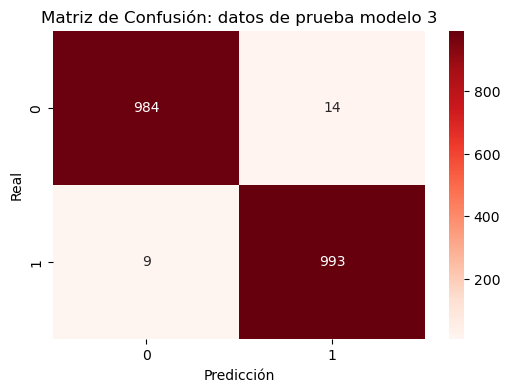

In [21]:
capas = [5,       # Capa de entrada
        30,   # Capas ocultas
        1]       # Capa de salida
red = RedNeuronal(capas)
red.fit(x_train, y_train.reshape(-1, 1), epochs=1001, learning_rate=0.01)
y_pred = (red.predict(x_test) >= 0.5).astype(int)  # predicciones binarizadas

# Reporte de métricas
print("\nReporte de Clasificación:\n")
print(classification_report(y_test, y_pred, target_names=["Clase 0", "Clase 1"]))

# Crear matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión: datos de prueba modelo 3")
plt.show()

## Modelo 4

Epoch 0, Loss: 0.28630831965066816
Epoch 100, Loss: 0.26755800741530306
Epoch 200, Loss: 0.2500001679964174
Epoch 300, Loss: 0.43294489387805735
Epoch 400, Loss: 0.3550875137251647
Epoch 500, Loss: 0.36351003067710985
Epoch 600, Loss: 0.2650945461262992
Epoch 700, Loss: 0.4064540771650878
Epoch 800, Loss: 0.378816332487604
Epoch 900, Loss: 0.40463334048522565
Epoch 1000, Loss: 0.375094496435246

Reporte de Clasificación:

              precision    recall  f1-score   support

     Clase 0       0.00      0.00      0.00       998
     Clase 1       0.50      1.00      0.67      1002

    accuracy                           0.50      2000
   macro avg       0.25      0.50      0.33      2000
weighted avg       0.25      0.50      0.33      2000



c:\Users\Alan Contreras P\miniconda3\envs\retoHousing\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Alan Contreras P\miniconda3\envs\retoHousing\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Alan Contreras P\miniconda3\envs\retoHousing\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

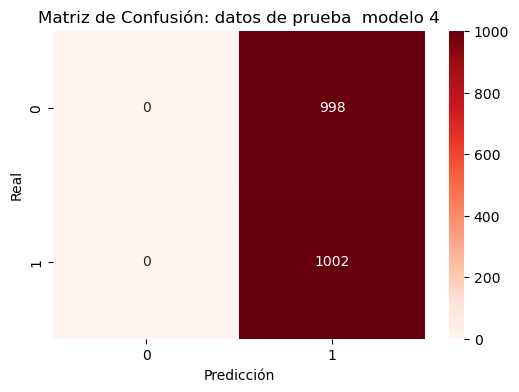

In [22]:
capas = [5,       # Capa de entrada
       3,3,3,3,3,3,3,3,3,3,   # Capas ocultas
       1]       # Capa de salida
red = RedNeuronal(capas)
red.fit(x_train, y_train.reshape(-1, 1), epochs=1001, learning_rate=0.01)
y_pred = (red.predict(x_test) >= 0.5).astype(int)  # predicciones binarizadas

# Reporte de métricas
print("\nReporte de Clasificación:\n")
print(classification_report(y_test, y_pred, target_names=["Clase 0", "Clase 1"]))

# Crear matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión: datos de prueba  modelo 4")
plt.show()

## Modelo 5

Epoch 0, Loss: 0.30293015552296587
Epoch 100, Loss: 0.500249999455404
Epoch 200, Loss: 0.5002499994553948
Epoch 300, Loss: 0.5002499994553855
Epoch 400, Loss: 0.5002499994553763
Epoch 500, Loss: 0.5002499994553671
Epoch 600, Loss: 0.5002499994553579
Epoch 700, Loss: 0.5002499994553485
Epoch 800, Loss: 0.5002499994553393
Epoch 900, Loss: 0.5002499994553301
Epoch 1000, Loss: 0.5002499994553209

Reporte de Clasificación:

              precision    recall  f1-score   support

     Clase 0       0.50      1.00      0.67       998
     Clase 1       0.00      0.00      0.00      1002

    accuracy                           0.50      2000
   macro avg       0.25      0.50      0.33      2000
weighted avg       0.25      0.50      0.33      2000



c:\Users\Alan Contreras P\miniconda3\envs\retoHousing\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Alan Contreras P\miniconda3\envs\retoHousing\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Alan Contreras P\miniconda3\envs\retoHousing\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

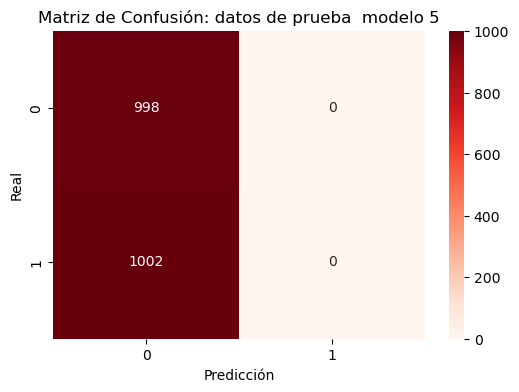

In [23]:
capas = [5,       # Capa de entrada
       10,10,10,10,10,   # Capas ocultas
       1]       # Capa de salida
red = RedNeuronal(capas)
red.fit(x_train, y_train.reshape(-1, 1), epochs=1001, learning_rate=0.01)
y_pred = (red.predict(x_test) >= 0.5).astype(int)  # predicciones binarizadas

# Reporte de métricas
print("\nReporte de Clasificación:\n")
print(classification_report(y_test, y_pred, target_names=["Clase 0", "Clase 1"]))

# Crear matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión: datos de prueba  modelo 5")
plt.show()

# importar a .py

In [24]:
!jupyter nbconvert --to script Practica1.ipynb

[NbConvertApp] Converting notebook Practica1.ipynb to script
[NbConvertApp] Writing 9257 bytes to Practica1.py
